In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s = pd.Series([1,3,4.2,np.nan, 6,8])
s

0    1.0
1    3.0
2    4.2
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range('20151021', periods=6, freq='M')
dates

DatetimeIndex(['2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31',
               '2016-02-29', '2016-03-31'],
              dtype='datetime64[ns]', freq='M')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2015-10-31,-0.565011,0.989261,0.436903,0.431832
2015-11-30,0.623765,-0.219367,0.093722,0.580510
2015-12-31,-0.350478,-0.124603,-2.400896,-1.115065
2016-01-31,0.196781,0.590917,0.249090,0.076621
2016-02-29,-0.173076,0.388587,0.886159,-0.498459
2016-03-31,-0.070825,1.190561,-0.417703,-2.144027


In [6]:
df2 = pd.DataFrame({
        'A': 1.,
        'B': pd.Timestamp('20151021'),
        'C': pd.Series(1, index=list(range(4)), dtype='float32'),
        'D': np.array([3**i for i in range(4)], dtype='int32'),
        'E': pd.Categorical(["test", "train"]*2),
        'F': list('love') 
    })
df2
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [26]:
df.A.values
df2.describe()
df

,A,B,C,D
2015-10-31,-0.958962,-0.668139,0.215051,-0.205290
2015-11-30,0.647750,-1.835859,-0.897387,-1.708646
2015-12-31,-0.685536,0.114655,1.285240,0.039606
2016-01-31,0.346325,0.309782,-1.684002,-0.731317
2016-02-29,-0.053710,1.021731,1.219823,-0.414801
2016-03-31,-1.036240,-0.905518,0.290285,-0.205974


In [22]:
df.at[dates[0], 'A']

-0.9589621168399769

In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2015-10-31,-0.958962,-0.668139,0.215051,-0.205290,one
2015-11-30,0.647750,-1.835859,-0.897387,-1.708646,one
2015-12-31,-0.685536,0.114655,1.285240,0.039606,two
2016-01-31,0.346325,0.309782,-1.684002,-0.731317,three
2016-02-29,-0.053710,1.021731,1.219823,-0.414801,four
2016-03-31,-1.036240,-0.905518,0.290285,-0.205974,three


In [35]:
df2[df2.E.isin(['two','four'])]

,A,B,C,D,E
2015-12-31,-0.685536,0.114655,1.285240,0.039606,two
2016-02-29,-0.053710,1.021731,1.219823,-0.414801,four


In [40]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20150921', periods=6, freq='M'))
df['F'] = s1

In [41]:
df

,A,B,C,D,F
2015-10-31,-0.958962,-0.668139,0.215051,-0.205290,2
2015-11-30,0.647750,-1.835859,-0.897387,-1.708646,3
2015-12-31,-0.685536,0.114655,1.285240,0.039606,4
2016-01-31,0.346325,0.309782,-1.684002,-0.731317,5
2016-02-29,-0.053710,1.021731,1.219823,-0.414801,6
2016-03-31,-1.036240,-0.905518,0.290285,-0.205974,NaN


In [42]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [55]:
df1.fillna(method='pad', limit=1)

,A,B,C,D,F,E
2015-10-31,-0.958962,-0.668139,0.215051,-0.205290,NaN,1
2015-11-30,0.647750,-1.835859,-0.897387,-1.708646,3,1
2015-12-31,-0.685536,0.114655,1.285240,0.039606,4,1
2016-01-31,0.346325,0.309782,-1.684002,-0.731317,5,NaN


In [56]:
pd.isnull(df1)

,A,B,C,D,F,E
2015-10-31,False,False,False,False,True,False
2015-11-30,False,False,False,False,False,False
2015-12-31,False,False,False,False,False,True
2016-01-31,False,False,False,False,False,True


In [63]:
df1

,A,B,C,D,F,E
2015-10-31,-0.958962,-0.668139,0.215051,-0.205290,NaN,1
2015-11-30,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,-0.685536,0.114655,1.285240,0.039606,4,NaN
2016-01-31,0.346325,0.309782,-1.684002,-0.731317,5,NaN


In [74]:
df1 = df1.fillna(df1.mean())

In [75]:
df1.mean(1)

2015-10-31    0.647110
2015-11-30    0.770967
2015-12-31    0.958994
2016-01-31    0.706798
Freq: M, dtype: float64

In [76]:
s = pd.Series([None, 1,3,None], index = dates[0:4])
s

2015-10-31   NaN
2015-11-30     1
2015-12-31     3
2016-01-31   NaN
Freq: M, dtype: float64

In [83]:
df1

,A,B,C,D,F,E
2015-10-31,-0.958962,-0.668139,0.215051,-0.205290,4.5,1
2015-11-30,-0.432724,-0.081234,-0.061237,-0.299000,4.5,1
2015-12-31,-0.685536,0.114655,1.285240,0.039606,4.0,1
2016-01-31,0.346325,0.309782,-1.684002,-0.731317,5.0,1


In [86]:
df1.F.value_counts()

4.5    2
5.0    1
4.0    1
Name: F, dtype: int64

In [88]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.584247,-1.340950,-0.218932,0.044229
1,0.115596,0.694788,-1.999149,-2.313371
2,1.002796,-0.744915,-1.390048,2.161679
3,0.751375,-0.577282,-1.400061,-1.408320
4,-1.339663,0.457674,0.328793,0.243270
5,-0.327296,-0.031824,-0.268248,-0.810144
6,0.779255,0.529583,-0.090942,-0.525734
7,0.299773,-3.054527,0.112191,0.122342
8,-0.041224,-0.523513,-0.470123,-0.682280
9,-0.806587,0.376720,1.532921,-0.035375


In [89]:
pieces = [df[:3], df[3:7], df[7:]]

In [97]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [98]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [99]:
df

,0,1,2,3
0,0.584247,-1.340950,-0.218932,0.044229
1,0.115596,0.694788,-1.999149,-2.313371
2,1.002796,-0.744915,-1.390048,2.161679
3,0.751375,-0.577282,-1.400061,-1.408320
4,-1.339663,0.457674,0.328793,0.243270
5,-0.327296,-0.031824,-0.268248,-0.810144
6,0.779255,0.529583,-0.090942,-0.525734
7,0.299773,-3.054527,0.112191,0.122342
8,-0.041224,-0.523513,-0.470123,-0.682280
9,-0.806587,0.376720,1.532921,-0.035375


In [100]:
s = df.iloc[3]

In [101]:
s

0    0.751375
1   -0.577282
2   -1.400061
3   -1.408320
Name: 3, dtype: float64

In [103]:
df.append(s, ignore_index=True)

,0,1,2,3
0,0.584247,-1.340950,-0.218932,0.044229
1,0.115596,0.694788,-1.999149,-2.313371
2,1.002796,-0.744915,-1.390048,2.161679
3,0.751375,-0.577282,-1.400061,-1.408320
4,-1.339663,0.457674,0.328793,0.243270
5,-0.327296,-0.031824,-0.268248,-0.810144
6,0.779255,0.529583,-0.090942,-0.525734
7,0.299773,-3.054527,0.112191,0.122342
8,-0.041224,-0.523513,-0.470123,-0.682280
9,-0.806587,0.376720,1.532921,-0.035375


In [104]:
df.columns = list('ABCD')

In [105]:
df

,A,B,C,D
0,0.584247,-1.340950,-0.218932,0.044229
1,0.115596,0.694788,-1.999149,-2.313371
2,1.002796,-0.744915,-1.390048,2.161679
3,0.751375,-0.577282,-1.400061,-1.408320
4,-1.339663,0.457674,0.328793,0.243270
5,-0.327296,-0.031824,-0.268248,-0.810144
6,0.779255,0.529583,-0.090942,-0.525734
7,0.299773,-3.054527,0.112191,0.122342
8,-0.041224,-0.523513,-0.470123,-0.682280
9,-0.806587,0.376720,1.532921,-0.035375


In [106]:
df = df.append(df.iloc[0:2], ignore_index=True)

In [107]:
df

,A,B,C,D
0,0.584247,-1.340950,-0.218932,0.044229
1,0.115596,0.694788,-1.999149,-2.313371
2,1.002796,-0.744915,-1.390048,2.161679
3,0.751375,-0.577282,-1.400061,-1.408320
4,-1.339663,0.457674,0.328793,0.243270
5,-0.327296,-0.031824,-0.268248,-0.810144
6,0.779255,0.529583,-0.090942,-0.525734
7,0.299773,-3.054527,0.112191,0.122342
8,-0.041224,-0.523513,-0.470123,-0.682280
9,-0.806587,0.376720,1.532921,-0.035375


In [108]:
df['E'] = ['foo', 'bar']*6
df['F'] = ['one', 'two', 'three']*4
df

,A,B,C,D,E,F
0,0.584247,-1.340950,-0.218932,0.044229,foo,one
1,0.115596,0.694788,-1.999149,-2.313371,bar,two
2,1.002796,-0.744915,-1.390048,2.161679,foo,three
3,0.751375,-0.577282,-1.400061,-1.408320,bar,one
4,-1.339663,0.457674,0.328793,0.243270,foo,two
5,-0.327296,-0.031824,-0.268248,-0.810144,bar,three
6,0.779255,0.529583,-0.090942,-0.525734,foo,one
7,0.299773,-3.054527,0.112191,0.122342,bar,two
8,-0.041224,-0.523513,-0.470123,-0.682280,foo,three
9,-0.806587,0.376720,1.532921,-0.035375,bar,one


In [124]:
for name, group in df.groupby(['E','F']):
    print name
    print group

('bar', 'one')
          A         B         C         D    E    F
3  0.751375 -0.577282 -1.400061 -1.408320  bar  one
9 -0.806587  0.376720  1.532921 -0.035375  bar  one
('bar', 'three')
           A         B         C         D    E      F
5  -0.327296 -0.031824 -0.268248 -0.810144  bar  three
11  0.115596  0.694788 -1.999149 -2.313371  bar  three
('bar', 'two')
          A         B         C         D    E    F
1  0.115596  0.694788 -1.999149 -2.313371  bar  two
7  0.299773 -3.054527  0.112191  0.122342  bar  two
('foo', 'one')
          A         B         C         D    E    F
0  0.584247 -1.340950 -0.218932  0.044229  foo  one
6  0.779255  0.529583 -0.090942 -0.525734  foo  one
('foo', 'three')
          A         B         C         D    E      F
2  1.002796 -0.744915 -1.390048  2.161679  foo  three
8 -0.041224 -0.523513 -0.470123 -0.682280  foo  three
('foo', 'two')
           A         B         C         D    E    F
4  -1.339663  0.457674  0.328793  0.243270  foo  two
10  0

In [110]:
def getlettertype(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'

In [121]:
gb = df.groupby(getlettertype, axis=1)

In [123]:
gb.A

In [125]:
df

,A,B,C,D,E,F
0,0.584247,-1.340950,-0.218932,0.044229,foo,one
1,0.115596,0.694788,-1.999149,-2.313371,bar,two
2,1.002796,-0.744915,-1.390048,2.161679,foo,three
3,0.751375,-0.577282,-1.400061,-1.408320,bar,one
4,-1.339663,0.457674,0.328793,0.243270,foo,two
5,-0.327296,-0.031824,-0.268248,-0.810144,bar,three
6,0.779255,0.529583,-0.090942,-0.525734,foo,one
7,0.299773,-3.054527,0.112191,0.122342,bar,two
8,-0.041224,-0.523513,-0.470123,-0.682280,foo,three
9,-0.806587,0.376720,1.532921,-0.035375,bar,one


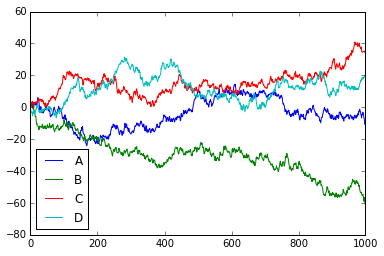

In [2]:
df = pd.DataFrame(np.random.randn(1000,4), columns = list('ABCD'))
plt.figure()
df.cumsum().plot()

In [3]:
n = 100000
%timeit range(n)
%timeit xrange(n)

100 loops, best of 3: 2.29 ms per loop
The slowest run took 9.07 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 342 ns per loop
